## 서울 생활이동 데이터 분석 (3)  - 시각화 (QGIS)

#### QGIS를 활용하여 서울 생활이동 데이터 분석(2)에서 많은 사람들이 많이 방문하는 지역에 대해 시각적으로 확인해보자.

QGIS에서 시군구 코드를 사용해야 함으로 원래 데이터를 활용하여 진행하자

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
## 서울 생활이동 데이터 분석 (1)의 자료를 업로드
origin_data = pd.read_csv("C:\\Users\\USER\\Desktop\\Project\\Proceed\\Seoul_population_movement\\origin_sep_movement.csv", encoding='utf-8')
gu_code = pd.read_excel("C:\\Users\\USER\\Desktop\\Project\\Proceed\\Seoul_population_movement\\replace_code.xlsx")

In [3]:
origin_data.head(10)

,Unnamed: 0,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,0,202109,일,1,11060,31230,M,60,EE,80,3.5
1,1,202109,일,1,11220,26000,M,35,EE,120,*
2,2,202109,일,1,11050,31120,F,20,EE,10,*
3,3,202109,일,1,11250,11240,M,60,HE,40,10.52
4,4,202109,일,1,11230,11110,F,15,EE,50,4.11
5,5,202109,일,1,11190,11190,F,20,WW,20,42.34
6,6,202109,일,1,11230,11050,M,55,WH,10,16.49
7,7,202109,일,1,11010,11040,M,25,EH,30,4.51
8,8,202109,일,1,11110,21000,F,35,HE,90,3.03
9,9,202109,일,1,31060,11180,F,25,HE,10,*


In [4]:
departure_data = origin_data['출발 시군구 코드'].value_counts()
departure_data = pd.DataFrame(departure_data)

In [5]:
departure_data.reset_index(inplace = True)

In [6]:
departure_data['지역 이름'] = departure_data['index']

In [7]:
departure_data.columns = ['지역구 코드','인원(출발지)','지역']

In [8]:
## 코드를 이용해 지역명으로 변환
for i in range(0,len(gu_code)):
    departure_data['지역'] = departure_data['지역'].replace(gu_code['시군구'][i], gu_code['full name'][i])

In [9]:
## QGIS에 사용할 수 있도록 저장
departure_data.to_csv("C:\\Users\\USER\\Desktop\\Project\\Proceed\\Seoul_population_movement\\departure_sep.csv", encoding='utf-8', index=False)

#### Trouble Shooting!!

QGIS의 행정구역 코드와 서울시 시군구 코드와 매칭이 되지 않는 문제가 발생하여 서울시 시군구 코드를 행정구역 코드에 맞춰 변경

In [10]:
qgis_code = pd.read_excel("C:\\Users\\USER\\Desktop\\Project\\Proceed\\Seoul_population_movement\\QGIS_code.xlsx")

In [11]:
qgis_code.head(20)

,시도,시군구,name,full name,변경된 시군구
0,11000,11010,종로구,서울특별시 종로구,11110
1,11000,11020,중구,서울특별시 중구,11140
2,11000,11030,용산구,서울특별시 용산구,11170
3,11000,11040,성동구,서울특별시 성동구,11200
4,11000,11050,광진구,서울특별시 광진구,11215
5,11000,11060,동대문구,서울특별시 동대문구,11230
6,11000,11070,중랑구,서울특별시 중랑구,11260
7,11000,11080,성북구,서울특별시 성북구,11290
8,11000,11090,강북구,서울특별시 강북구,11305
9,11000,11100,도봉구,서울특별시 도봉구,11320


In [17]:
mod_departure = origin_data['출발 시군구 코드'].value_counts()
mod_departure = pd.DataFrame(mod_departure)
mod_departure.reset_index(inplace = True)

mod_departure['지역 이름'] = mod_departure['index']
mod_departure['수정된 지역구 코드'] = mod_departure['index']
mod_departure.columns = ['지역구 코드','인원(출발지)','지역', '수정된 지역구 코드']


In [20]:
mod_departure.head()

,지역구 코드,인원(출발지),지역,수정된 지역구 코드
0,11230,1225419,11230,11230
1,11220,1069534,11220,11220
2,11240,1014636,11240,11240
3,11190,945155,11190,11190
4,11140,861246,11140,11140


In [21]:
## 변경된 QGIS 코드를 이용해 지역명과 변경된 코드로 변경
for i in range(len(qgis_code)):
    mod_departure['지역'] = mod_departure['지역'].replace(qgis_code['시군구'][i], qgis_code['full name'][i])
    mod_departure['수정된 지역구 코드'] = mod_departure['수정된 지역구 코드'].replace(qgis_code['시군구'][i], qgis_code['변경된 시군구'][i])

In [22]:
## QGIS 상황에 맞게 순서 및 칼럼 선택 후 저장하기
mod_departure = mod_departure[['수정된 지역구 코드', '지역', '인원(출발지)']]

mod_departure.to_csv("C:\\Users\\USER\\Desktop\\Project\\Proceed\\Seoul_population_movement\\departure_sep_qgis.csv", encoding='utf-8', index=False)

#### Trouble Shooting!!

QGIS를 사용하여 확인하는 도중 몇몇 구가 빠져있는 이유를 확인하였고 문제를 파악하던 중 지역구 코드 수정 과정 중에 중복되어 입력되어 있는 것을 확인함. 코드를 살펴봤지만 어떤 부분이 문제인지 찾지 못하여 위의 csv에서 이를 수정함

수정한 목록 : 서울시 종로구, 서울시 중구, 서울시 용산구, 서울시 동대문구, 서울시 성동구

In [23]:
mod_departure.head(20)

,수정된 지역구 코드,지역,인원(출발지)
0,11680,서울특별시 강남구,1225419
1,11650,서울특별시 서초구,1069534
2,11710,서울특별시 송파구,1014636
3,11560,서울특별시 영등포구,945155
4,11440,서울특별시 마포구,861246
5,11440,서울특별시 중구,860847
6,11500,서울특별시 강서구,849286
7,11350,서울특별시 종로구,815535
8,11620,서울특별시 관악구,775544
9,11530,서울특별시 용산구,771421


In [29]:
## 위의 수정한 엑셀이 인코딩 문제로 한글이 깨짐 -> 주피터에서 불러오고 다시 저장하는 방식 차용
temp = pd.read_csv("C:\\Users\\USER\\Desktop\\Project\\Proceed\\Seoul_population_movement\\sep_departure_GIS.csv", encoding='cp949')
temp.to_csv("C:\\Users\\USER\\Desktop\\Project\\Proceed\\Seoul_population_movement\\202109_departure.csv", encoding='utf-8', index=False)

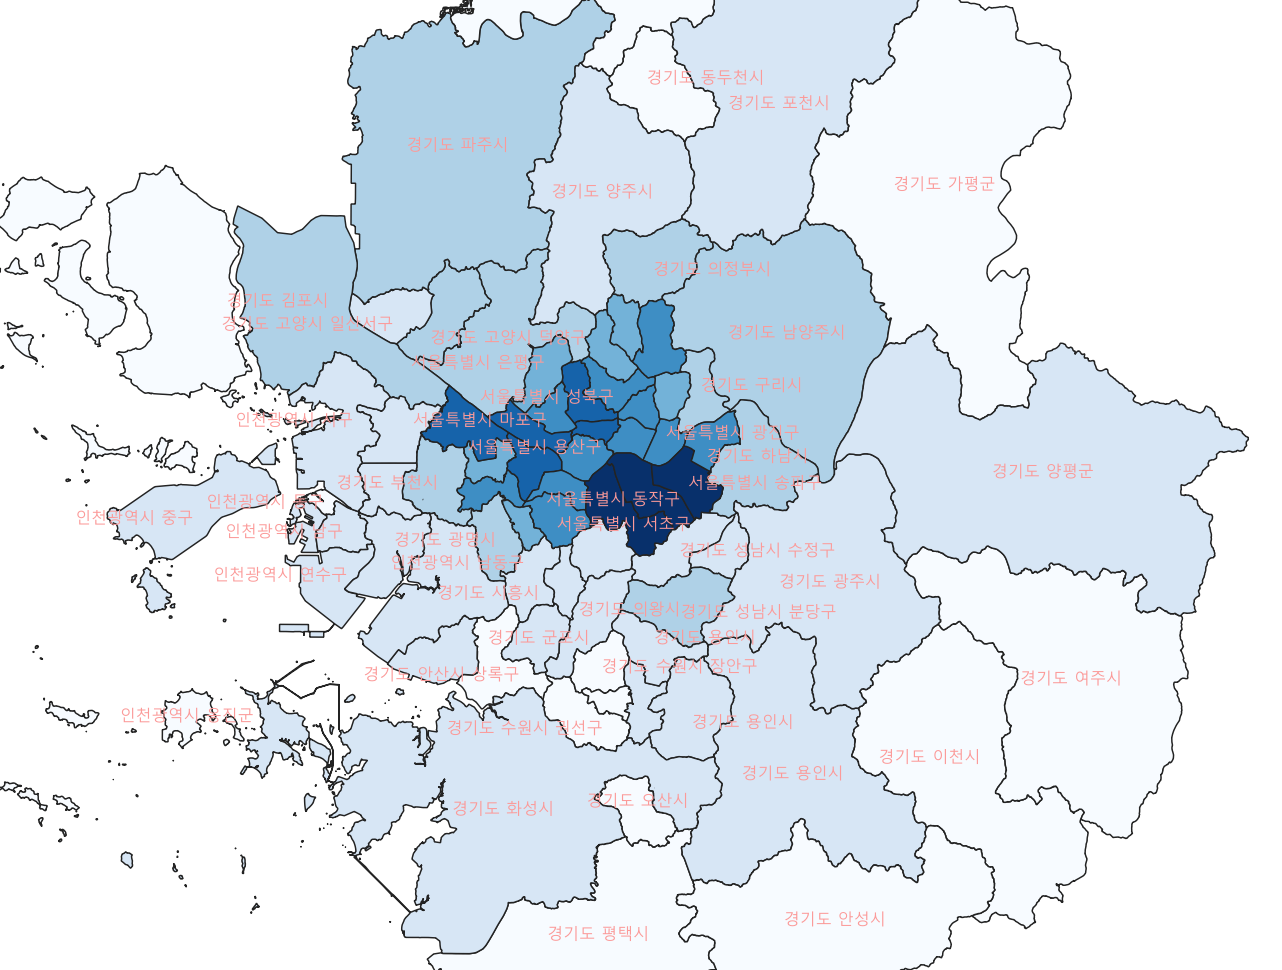

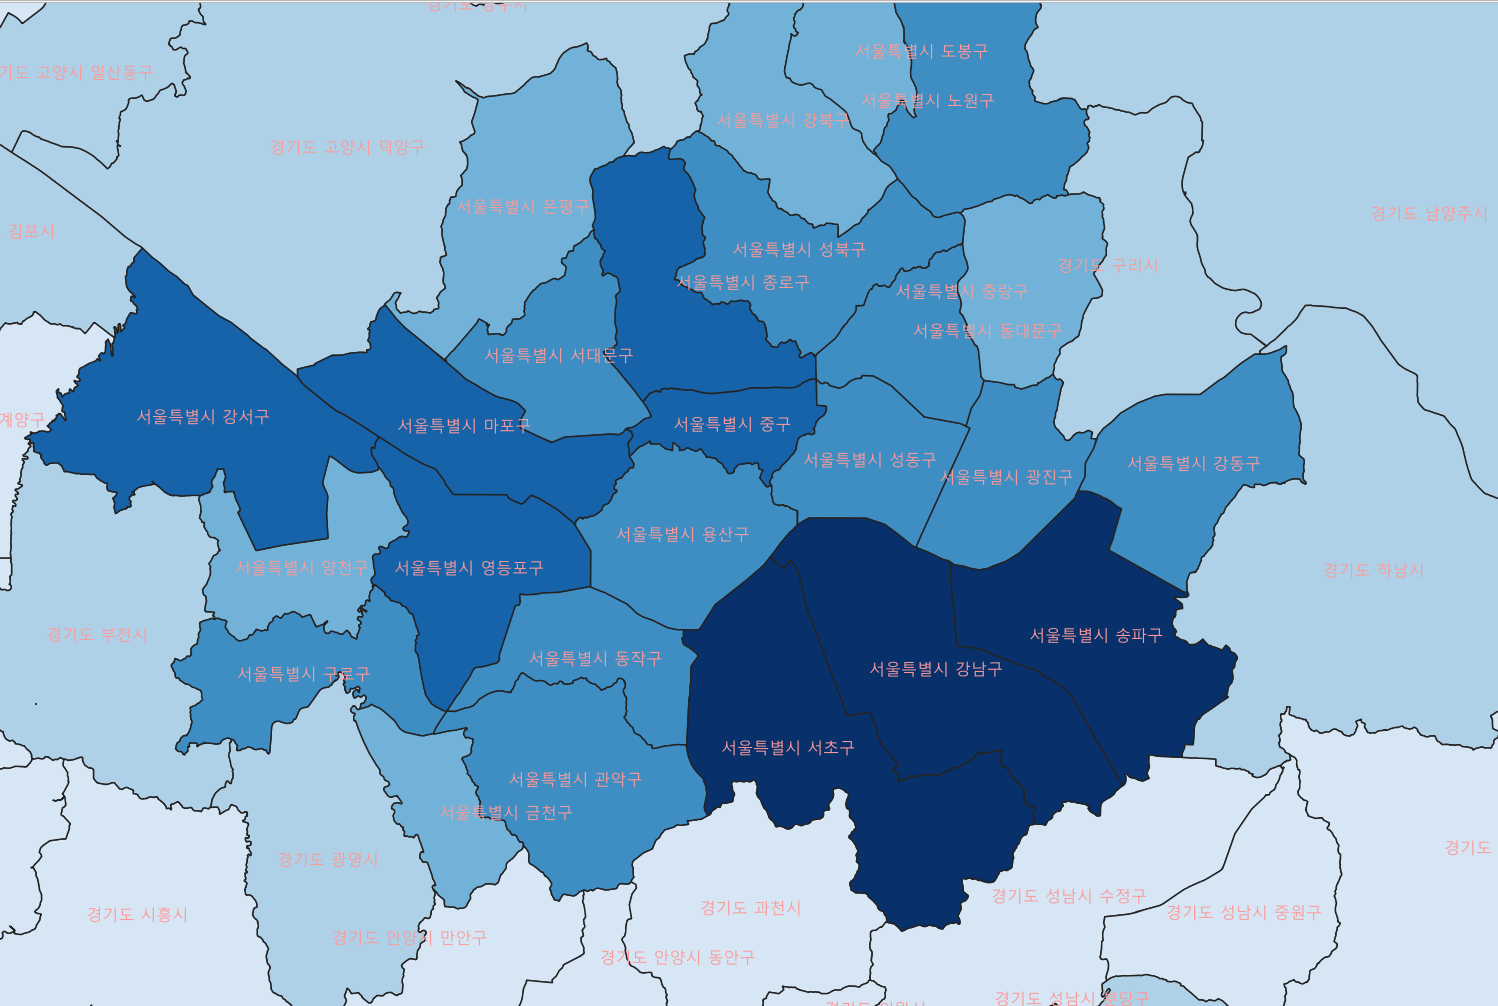

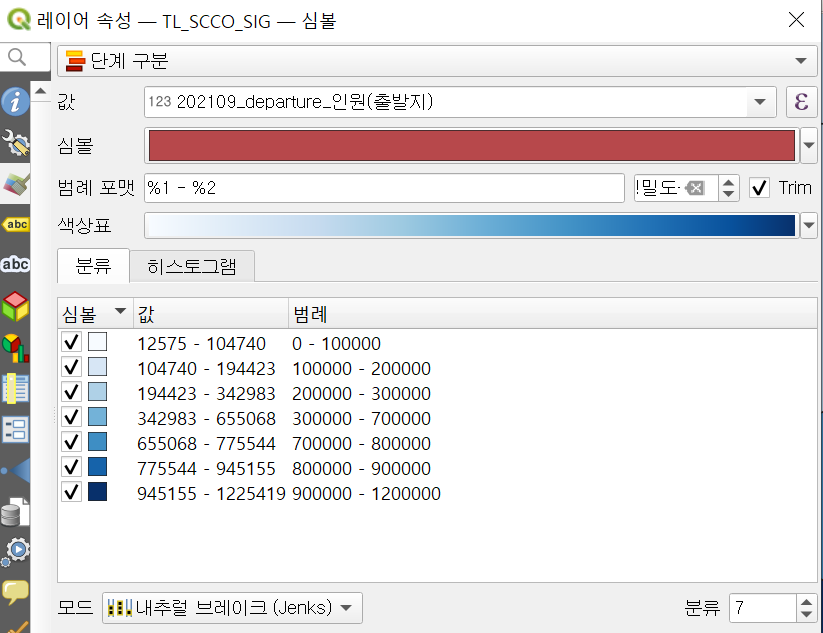

### 이번엔 도착지에 대한 인구이동에 대해 시각화해보자.



In [30]:
mod_arrive = origin_data['도착 시군구 코드'].value_counts()
mod_arrive = pd.DataFrame(mod_arrive)
mod_arrive.reset_index(inplace = True)

mod_arrive['지역 이름'] = mod_arrive['index']
mod_arrive['수정된 지역구 코드'] = mod_arrive['index']
mod_arrive.columns = ['지역구 코드','인원(도착지)','지역', '수정된 지역구 코드']


In [31]:
## 변경된 QGIS 코드를 이용해 지역명과 변경된 코드로 변경
for i in range(len(qgis_code)):
    mod_arrive['지역'] = mod_arrive['지역'].replace(qgis_code['시군구'][i], qgis_code['full name'][i])
    mod_arrive['수정된 지역구 코드'] = mod_arrive['수정된 지역구 코드'].replace(qgis_code['시군구'][i], qgis_code['변경된 시군구'][i])

In [36]:
# QGIS 상황에 맞게 순서 및 칼럼 선택 후 저장하기
mod_arrive = mod_arrive[['수정된 지역구 코드', '지역', '인원(도착지)']]

mod_arrive.to_csv("C:\\Users\\USER\\Desktop\\Project\\Proceed\\Seoul_population_movement\\arrive_sep_qgis.csv", encoding='utf-8', index=False)

In [37]:
## 출발과 같은 문제 발생
mod_departure.head(20)

,수정된 지역구 코드,지역,인원(출발지)
0,11680,서울특별시 강남구,1225419
1,11650,서울특별시 서초구,1069534
2,11710,서울특별시 송파구,1014636
3,11560,서울특별시 영등포구,945155
4,11440,서울특별시 마포구,861246
5,11440,서울특별시 중구,860847
6,11500,서울특별시 강서구,849286
7,11350,서울특별시 종로구,815535
8,11620,서울특별시 관악구,775544
9,11530,서울특별시 용산구,771421


In [39]:
## 위의 수정한 엑셀이 인코딩 문제로 한글이 깨짐 -> 주피터에서 불러오고 다시 저장하는 방식 차용
temp = pd.read_csv("C:\\Users\\USER\\Desktop\\Project\\Proceed\\Seoul_population_movement\\arrive_sep_GIS.csv", encoding='cp949')
temp.to_csv("C:\\Users\\USER\\Desktop\\Project\\Proceed\\Seoul_population_movement\\202109_arrive.csv", encoding='utf-8', index=False)

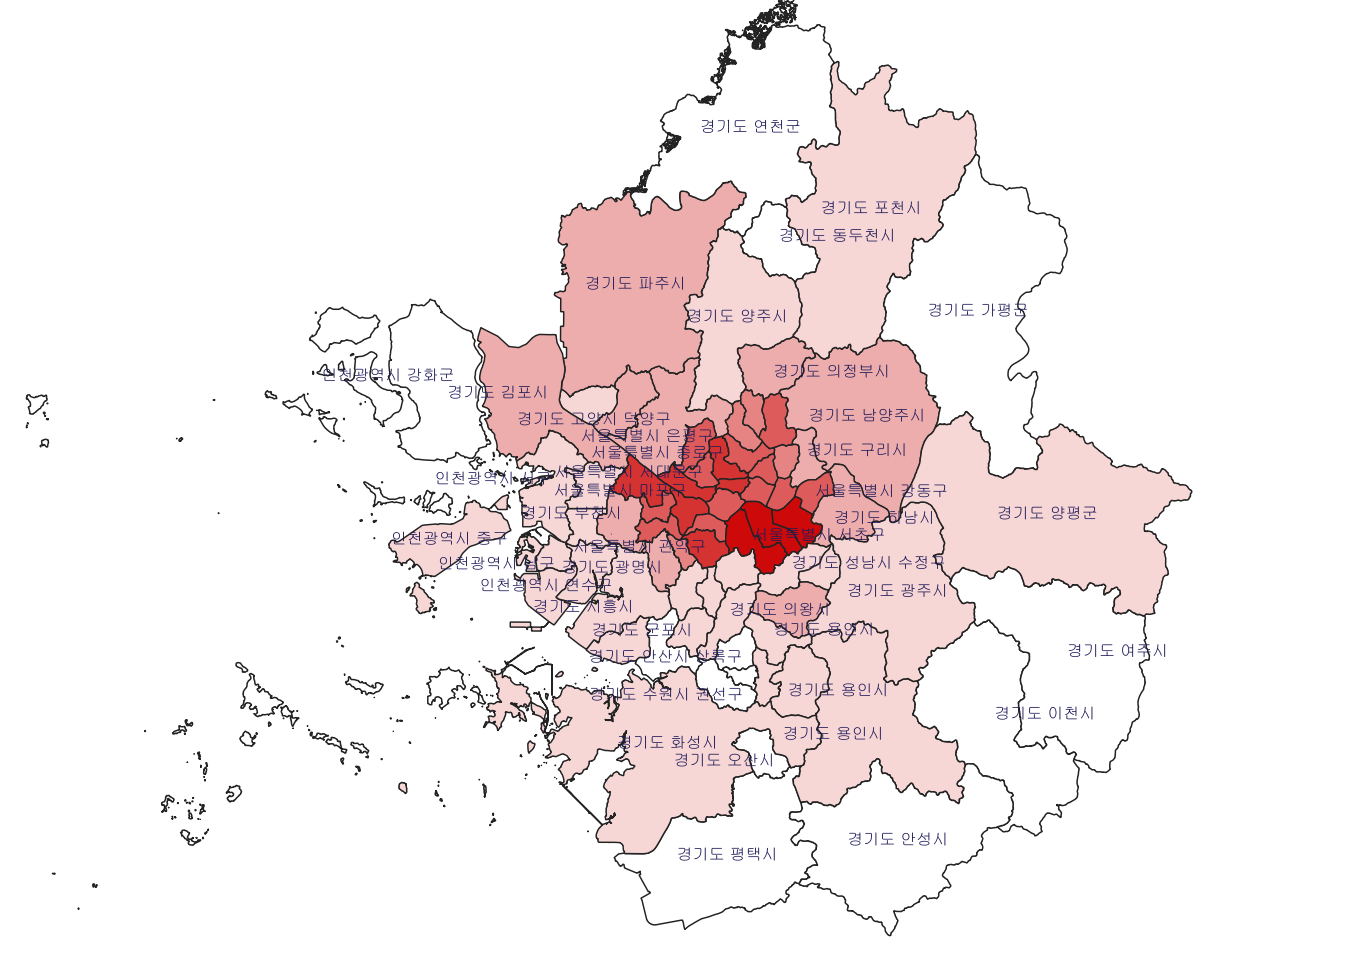

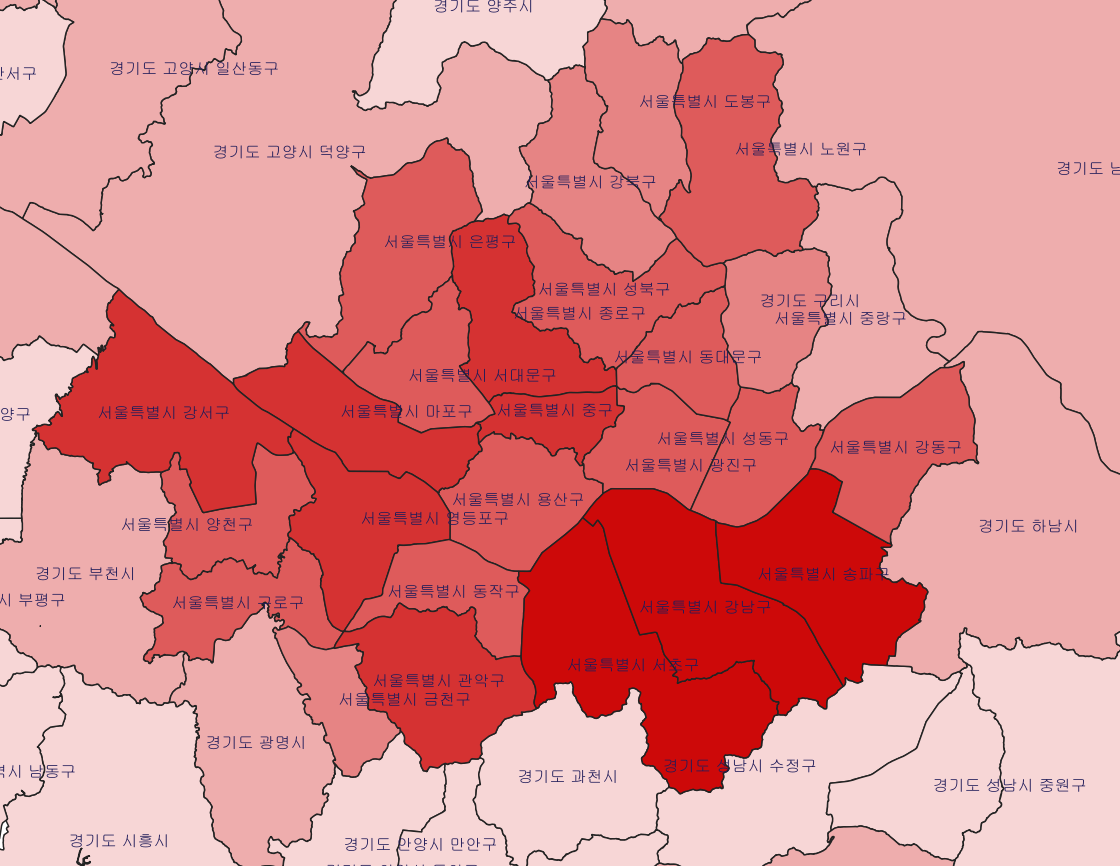

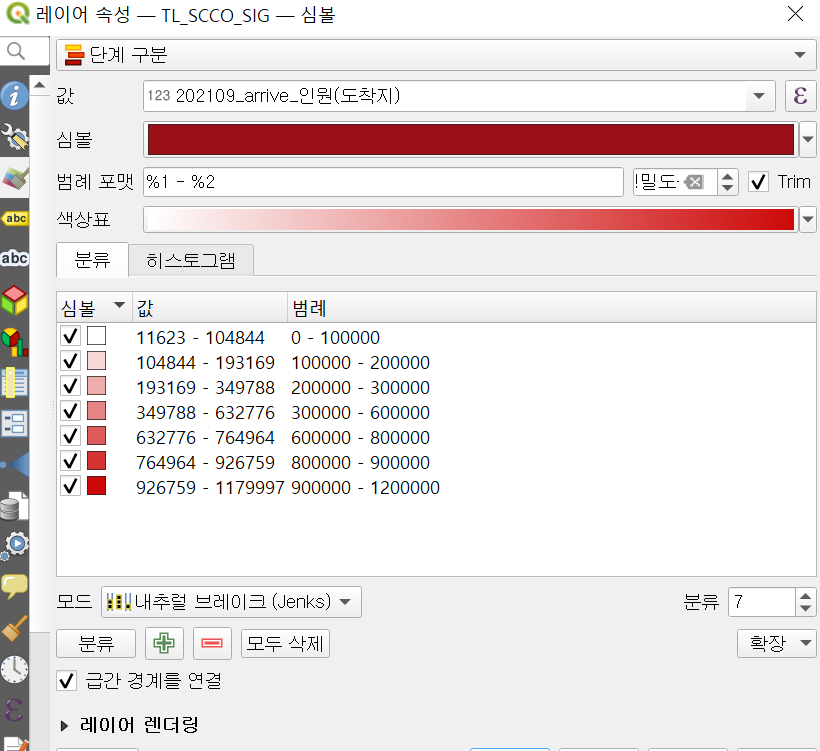

참고한 사이트

https://blog.naver.com/yunsoo30/222349957503